In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [240]:
data = pd.read_csv("Downloads/Toyota.csv")
data.head(10)

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
6,6,16900,27.0,??,Diesel,????,NaN,0,2000,3,1245
7,7,18600,30.0,75889,NaN,90,1.0,0,2000,3,1245
8,8,21500,27.0,19700,Petrol,192,0.0,0,1800,3,1185
9,9,12950,23.0,71138,Diesel,????,NaN,0,1900,3,1105


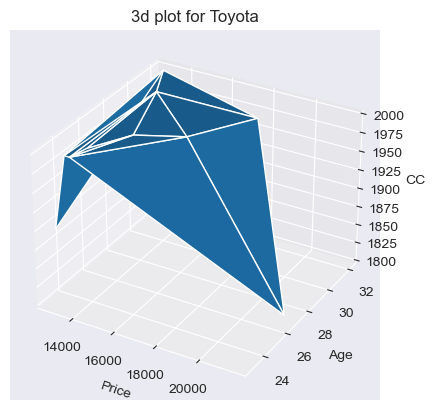

In [251]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
ax.plot_trisurf(data['Price'][:10],data['Age'][:10],data['CC'][:10])
ax.set_xlabel('Price')
ax.set_ylabel('Age')
ax.set_zlabel('CC')
plt.title('3d plot for Toyota')
plt.show()

In [14]:
from queue import PriorityQueue

In [21]:
v = 5
graph = [[] for i in range(v)]
def best_first_search(actual_src,target,n):
    visited = [False]*n
    pq = PriorityQueue()
    pq.put((0,actual_src))
    visited[actual_src] = True
    while pq.empty() == False:
        u = pq.get()[1]
        print(u,end=" ")
        if (u == target):
            break
        for v,c in graph[u]:
            if visited[v] == False:
                visited[v] = True
                pq.put((c,v))
    print()
def addEdge(x,y,cost):
    graph[x].append((y,cost))
    graph[y].append((x,cost))
addEdge(0,1,3)
addEdge(0,2,2)
addEdge(1,3,7)
addEdge(2,4,2)
addEdge(3,4,6)

source = 0
target = 4

best_first_search(source,target,v)

0 2 4 


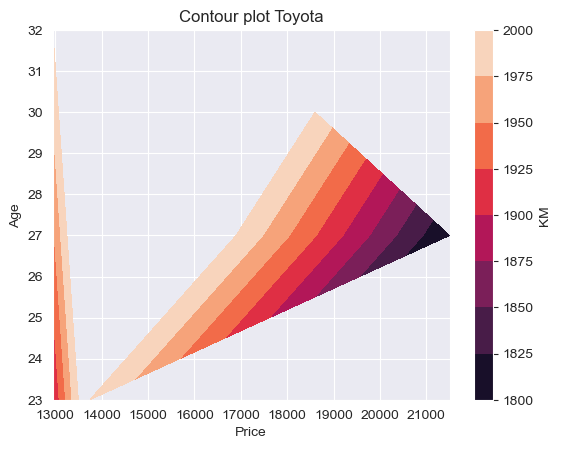

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Downloads\Toyota.csv")
fig = plt.figure()
plt.tricontourf(data['Price'][:10],data['Age'][:10],data['CC'][:10])
plt.xlabel('Price')
plt.ylabel('Age')
plt.colorbar(label='CC')
plt.title('Contour plot Toyota')
plt.show()

In [56]:
#2A A*
from queue import PriorityQueue
def a_star(graph,heuristic,source,goal):

    visited = []
    pq = PriorityQueue()
    pq.put((0,[source]))

    while not pq.empty():
        cost, path = pq.get()
        node = path[-1]
        if node == goal:
            visited.append(node)
            return (visited,path)
        visited.append(node)
        for adj,weight in graph[node]:
            if adj not in visited:
                pri = hueristic[adj]
                new_path = list(path)
                new_path.append(adj)
                pq.put(((pri+weight),new_path))
    return None

n = 4
graph =[[] for _ in range(n)]
e = 5
graph[0].append((1,1))
graph[0].append((2,3))
graph[0].append((3,7))
graph[1].append((3,5))
graph[2].append((3,12))
hueristic = {}
hueristic[0] = 1
hueristic[1] = 1
hueristic[2] = 1
hueristic[3] = 1

res = a_star(graph,hueristic,0,3)
if res == None:
    print("Cant reach goal node")
else:
    print("The path is ")
    for i in res[1]:
        print(i,end="--> ")
    print()
    print("The visting order is ")
    for i in res[0]:
        print(i,end =" --> ")
    print()



The path is 
0--> 1--> 3--> 
The visting order is 
0 --> 1 --> 2 --> 3 --> 


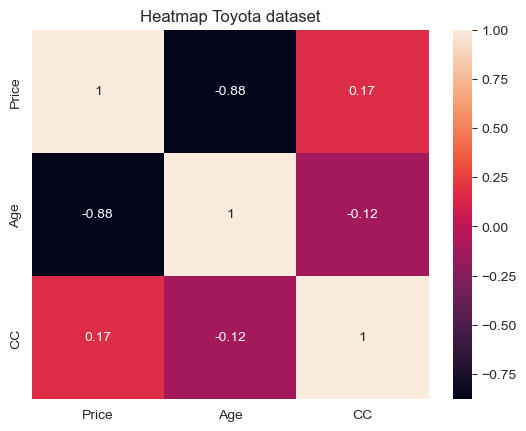

In [246]:
#3A Heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Downloads\Toyota.csv')
dimensions = ['Price','Age','KM','CC']
corr_matrix=data[dimensions].corr()
sns.heatmap(corr_matrix,annot=True)
plt.title('Heatmap Toyota dataset')
plt.show()

In [62]:
import math
def minimax(curDepth,nodeIndex,scores,maxTurn,targetDepth):
    if curDepth == targetDepth:
        return scores[nodeIndex]
    if maxTurn:
        return max(minimax(curDepth+1,nodeIndex*2,scores,False,targetDepth),minimax(curDepth+1,nodeIndex*2+1,scores,False,targetDepth))
    else:
        return min(minimax(curDepth+1,nodeIndex*2,scores,True,targetDepth),minimax(curDepth+1,nodeIndex*2+1,scores,True,targetDepth))
        
scores = [3,5,2,9,12,5,23,23]
depth = math.log(len(scores),2)
print(minimax(0,0,scores,True,depth))

12


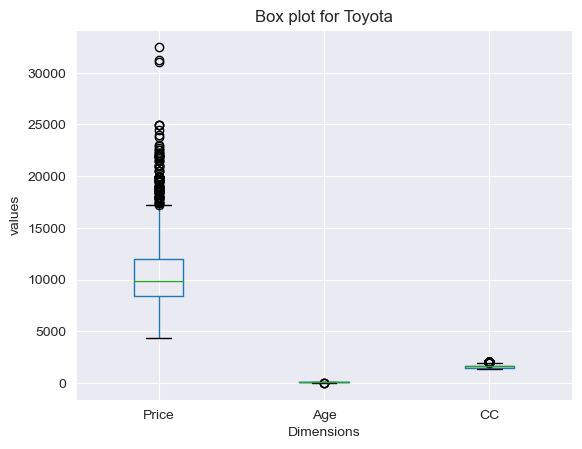

In [248]:
#4A box plot
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Downloads\Toyota.csv')
dimensions = ['Price','Age','KM','CC']
data[dimensions].boxplot()
plt.xlabel('Dimensions')
plt.ylabel('values')
plt.title('Box plot for Toyota')
plt.show()

In [70]:
#4B alpha beta pruning
MAX,MIN = 1000,-1000
def minimax(curDepth,nodeIndex,values,maxTurn,alpha,beta):
    if curDepth == 3:
        return values[nodeIndex]
    if maxTurn:
        best = MIN
        for i in range (0,2):
            val = minimax(curDepth+1,nodeIndex*2+i,values,False,alpha,beta)
            best = max(val,best)
            alpha = max(best,alpha)
            if beta <= alpha:
                break
        return best
    else:
        best = MAX
        for i in range(0,2):
            val = minimax(curDepth+1,nodeIndex*2+i,values,True,alpha,beta)
            best = min(best,val)
            beta = min(beta,best)
            if beta <= alpha:
                break
        return best
values = [3,5,6,9,1,2,0,-1]
print(minimax(0,0,values,True,MIN,MAX))

5


In [117]:
#5 Naive Bayes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

label_encoder = preprocessing.LabelEncoder()
sns.set_style('darkgrid')

In [118]:
col_names = ['PassengerId','Survived','PClass','Name','Sex','Age','SibSp','Parch',"Ticket",'Fare','Cabin','Embarked']
data = pd.read_csv('Titanic.csv',skiprows=1,header = 0,names = col_names)
data.head(10)

,PassengerId,Survived,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
6,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
7,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
8,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
9,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [119]:
data.dropna(subset = ["Embarked","Age"],inplace = True)
data.drop('Name',axis = 1,inplace=True)
data.drop('PassengerId',axis = 1,inplace = True)
data.drop('SibSp',axis = 1,inplace = True)
data.drop('Parch',axis = 1,inplace = True)
data.drop('Cabin',axis = 1,inplace = True)
data.drop('Ticket',axis = 1,inplace = True)
data["Sex"] = label_encoder.fit_transform(data['Sex'])
data['Embarked']= label_encoder.fit_transform(data['Embarked'])
data.head(10)

,Survived,PClass,Sex,Age,Fare,Embarked
0,1,1,0,38.0,71.2833,0
1,1,3,0,26.0,7.9250,2
2,1,1,0,35.0,53.1000,2
3,0,3,1,35.0,8.0500,2
5,0,1,1,54.0,51.8625,2
6,0,3,1,2.0,21.0750,2
7,1,3,0,27.0,11.1333,2
8,1,2,0,14.0,30.0708,0
9,1,3,0,4.0,16.7000,2
10,1,1,0,58.0,26.5500,2


In [133]:
def calc_prior(data,Y):
    classes = sorted(list(data[Y].unique()))
    sum = 0
    prior = []
    for i in classes:
        prior.append(len(data[data[Y]==i])/len(data))
    return prior
def calc_likelihood(data,feat_name,feat_val,Y,label):
    feat = list(data.columns)
    data = data[data[Y] == label]
    mean, std = data[feat_name].mean(),data[feat_name].std()
    p_x_given_y = (1/(np.sqrt(2*np.pi)*std))*np.exp(-((feat_val - mean))**2/(2*std**2))
    return p_x_given_y
def naive_bayes(data,X,Y):
    features = list(data.columns)[1:]
    prior = calc_prior(data,Y)
    Y_pred = []
    for x in X:
        labels = sorted(list(data[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calc_likelihood(data,features[i],x[i],Y,labels[j])
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j]*prior[j]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)


In [134]:
train,test = train_test_split(data,test_size =.3,random_state = 41)
X_test = data.iloc[:,1:].values
Y_test = data.iloc[:,0].values
Y_pred = naive_bayes(train,X=X_test,Y="Survived")


In [135]:
from sklearn.metrics import confusion_matrix,f1_score
print(confusion_matrix(Y_test,Y_pred))
print(f1_score(Y_test,Y_pred,average='macro'))

[[367  56]
 [ 96 192]]
0.7724301741855059


<AxesSubplot:>

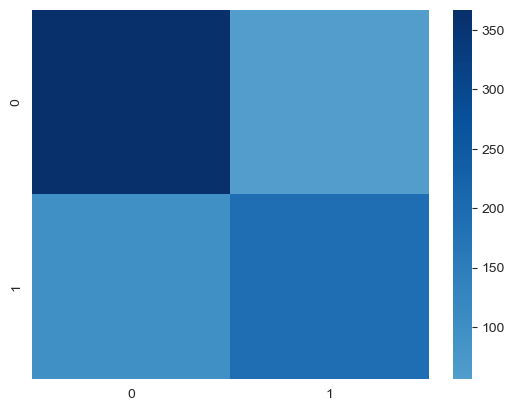

In [136]:
sns.heatmap(confusion_matrix(Y_test,Y_pred),center = 0, cmap = 'Blues')

In [165]:
#6 KNN glass k=3 70-30
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

def distance(x1,x2):
    dist = np.sqrt(np.sum((x1-x2)**2))
    return dist
class KNN:
    def __init__(self, k):
        self.k = k
    def fit(self,x,y):
        self.x_train = x
        self.y_train = y
    def predict(self,X):
        predictions = [self._predict(x) for x in X]
        return predictions
    def _predict(self,x):
        distances = [distance(x,x_train) for x_train in self.x_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
data = pd.read_csv('Downloads/glass.csv')
data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [166]:
X = data.drop('Type',axis = 1).values
Y = data['Type'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =.3, random_state=43)
clf = KNN(3)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)
print(predictions)
acc = np.sum(predictions == Y_test)/len(Y_test)
print(acc)

[2, 7, 2, 1, 1, 1, 2, 3, 2, 2, 7, 1, 1, 7, 1, 3, 2, 5, 1, 2, 1, 3, 2, 1, 1, 5, 1, 1, 1, 1, 2, 7, 1, 2, 5, 1, 1, 6, 2, 2, 2, 2, 2, 2, 1, 2, 2, 5, 1, 2, 5, 2, 3, 7, 2, 6, 2, 2, 7, 2, 1, 2, 2, 2, 7]
0.6615384615384615


In [167]:
#7 KNN fruits k=3 80-20
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [168]:
def distance(x1,x2):
    dist = np.sum(np.abs(x1-x2))
    return dist

In [169]:
class KNN:
    def __init__(self,k):
        self.k = k
    def fit(self,X,Y):
        self.x_train = X
        self.y_train = Y
    def predict (self,X):
        predictions = [self._predict(x) for x in X]
        return predictions
    def _predict(self,x):
        distances = [distance(x,x_train) for x_train in self.x_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]


In [175]:
data = pd.read_csv('Downloads/fruit.csv')
data.head(10)

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79
5,2,80,5.8,4.3,0.77
6,2,80,5.9,4.3,0.81
7,2,76,5.8,4.0,0.81
8,1,178,7.1,7.8,0.92
9,1,172,7.4,7.0,0.89


In [176]:
X = data.drop('fruit_label',axis = 1).values
Y = data['fruit_label'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=102)
clf = KNN(3)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)
print(predictions)
acc = np.sum(predictions == Y_test)/len(Y_test)
print(acc)

[1, 1, 1, 3, 4, 3, 3, 1, 1, 1, 1, 3]
0.5833333333333334


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]


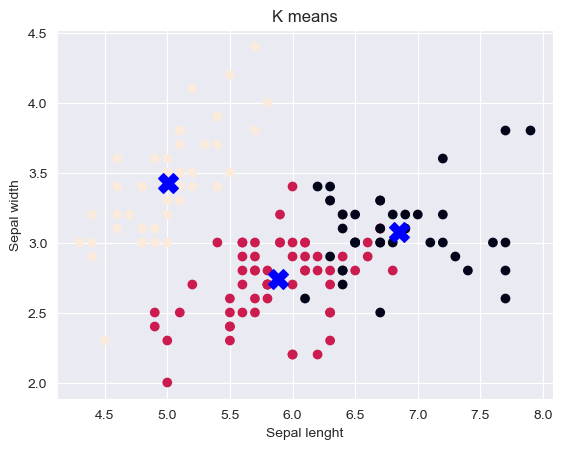

In [198]:
#8 kMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def kMeans(X,K,max_iters = 100):
    centroids = X[:K]
    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels,centroids
iris = load_iris()
X = iris.data
k = 3
labels, centroids = kMeans(X,k)
print(labels)
print(centroids)
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1],marker = "X",color = 'blue', s= 200)
plt.xlabel('Sepal lenght')
plt.ylabel('Sepal width')
plt.title('K means')
plt.show()

In [204]:
#9 Clustering
import numpy as np
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [217]:
def single_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            proximity_matrix[i,j] = np.min(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j,i] = proximity_matrix[i,j]
    return proximity_matrix
def complete_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            proximity_matrix[i,j] = np.max(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j,i] = proximity_matrix[i,j]
    return proximity_matrix


In [218]:
iris = load_iris()
data = iris.data[:5]
print(data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [219]:
single_matrix = single_linkage(data)
print(single_matrix)

[[0.         0.53851648 0.50990195 0.64807407 0.14142136]
 [0.53851648 0.         0.3        0.33166248 0.60827625]
 [0.50990195 0.3        0.         0.24494897 0.50990195]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.        ]]


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'dcoord': [[0.0, 0.1414213562373093, 0.1414213562373093, 0.0],
  [0.0, 0.24494897427831802, 0.24494897427831802, 0.0],
  [0.0, 0.30000000000000016, 0.30000000000000016, 0.24494897427831802],
  [0.1414213562373093,
   0.509901951359278,
   0.509901951359278,
   0.30000000000000016]],
 'ivl': ['0', '4', '1', '2', '3'],
 'leaves': [0, 4, 1, 2, 3],
 'color_list': ['C1', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2', 'C2']}

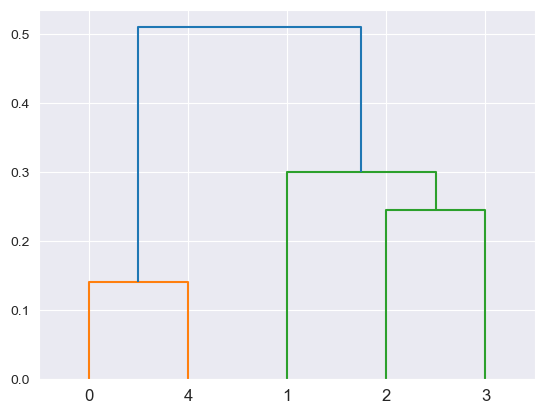

In [220]:
linkage_matrix = linkage(data,method="single")
dendrogram(linkage_matrix)

In [221]:
complete_matrix = complete_linkage(data)
print(complete_matrix)

[[0.         0.53851648 0.50990195 0.64807407 0.14142136]
 [0.53851648 0.         0.3        0.33166248 0.60827625]
 [0.50990195 0.3        0.         0.24494897 0.50990195]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.        ]]


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'dcoord': [[0.0, 0.1414213562373093, 0.1414213562373093, 0.0],
  [0.0, 0.24494897427831802, 0.24494897427831802, 0.0],
  [0.0, 0.3316624790355407, 0.3316624790355407, 0.24494897427831802],
  [0.1414213562373093,
   0.6480740698407862,
   0.6480740698407862,
   0.3316624790355407]],
 'ivl': ['0', '4', '1', '2', '3'],
 'leaves': [0, 4, 1, 2, 3],
 'color_list': ['C1', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2', 'C2']}

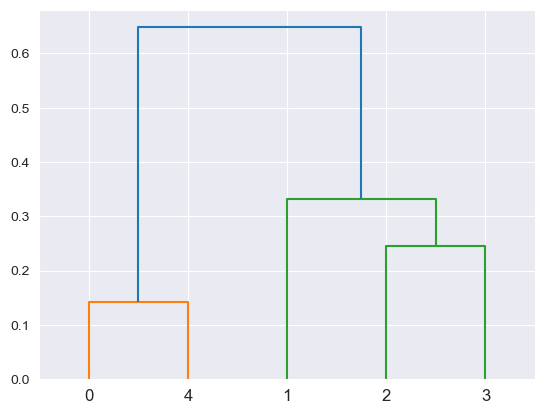

In [222]:
linkage_matrix = linkage(data,method="complete")
dendrogram(linkage_matrix)

(150, 4)
(150, 2)


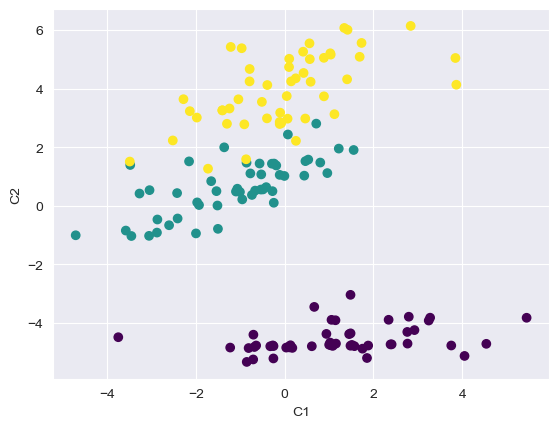

In [230]:
import numpy as np
class PCA:
    def __init__(self,n):
        self.n = n
        components = None
        self.mean = None
    def fit(self,X):
        self.mean = np.mean(X,axis = 0)
        X = X-self.mean
        cov = np.cov(X.T)
        eigenvectors,eigenvalues = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)
        idxs = idxs[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.components = eigenvectors[:self.n]
    def transform(self,X):
        X = X-self.mean
        return np.dot(X,self.components.T)
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data
y = iris.target
pca = PCA(2)
pca.fit(X)
x_projected = pca.transform(X)
print(X.shape)
print(x_projected.shape)
x1 = x_projected[:,0]
x2 = x_projected[:,1]
plt.scatter(x1,x2,c=y,cmap='viridis')
plt.xlabel('C1')
plt.ylabel('C2')
plt.show()

(150, 4)
(150, 2)


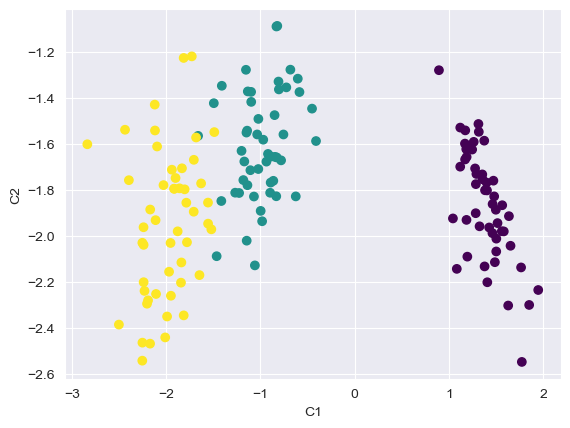

In [236]:
import numpy as np
class LDA:
    def __init__(self, n):
        self.n = n
        self.ld = None
    def fit(self,X,Y):
        features = X.shape[1]
        labels = np.unique(y)
        mean = np.mean(X,axis = 0)
        SW = np.zeros((features,features))
        SB = np.zeros((features,features))
        for c in labels:
            x_c = X[Y == c]
            mean_c = np.mean(x_c,axis = 0)
            SW += (x_c-mean_c).T.dot((x_c - mean_c))
            n_c = x_c.shape[0]
            mean_diff = (mean_c - mean).reshape(features,1)
            SB += n_c*(mean_diff).dot(mean_diff.T)
        A = np.linalg.inv(SW).dot(SB)
        evalues,evec = np.linalg.eig(A)
        evec = evec.T
        idxs = np.argsort(abs(evalues))[::-1]
        evalues = evalues[idxs]
        evec = evec[idxs]
        self.ld = evec[:self.n]
    def transform(self,x):
        return np.dot(x,self.ld.T)
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data
y = iris.target
lda = LDA(2)
lda.fit(X,y)
x_projected = lda.transform(X)
print(X.shape)
print(x_projected.shape)
x1 = x_projected[:,0]
x2 = x_projected[:,1]
plt.scatter(x1,x2,c=y,cmap='viridis')
plt.xlabel('C1')
plt.ylabel('C2')
plt.show()